<a href="https://colab.research.google.com/github/Rajfekar/PythonML/blob/main/ExceptionCNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install tf-explain

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.6/43.6 kB 1.4 MB/s eta 0:00:00


In [2]:
#import libraries
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tf_explain.core.activations import ExtractActivations
from tensorflow.keras.applications.xception import decode_predictions
%matplotlib inline

In [3]:
#load pre trained Xception model
model=tf.keras.applications.xception.Xception(weights='imagenet',include_top=True)
#Summary of Xception Model
print(model.summary)

91884032/91884032 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step
<bound method Model.summary of <Functional name=xception, built=True>>


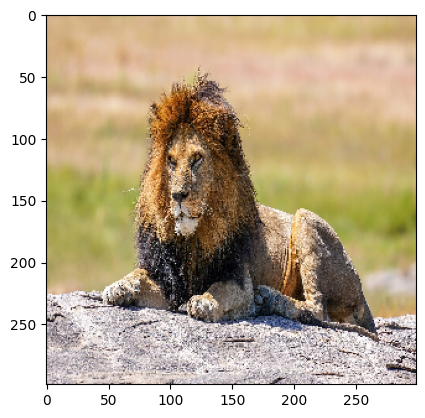

In [10]:
#loading and preprocessing cat image
# IMAGE_PATH='./chow.jpg'
IMAGE_PATH = './lion.jpg'
img=tf.keras.preprocessing.image.load_img(IMAGE_PATH,target_size=(299,299))
img=tf.keras.preprocessing.image.img_to_array(img)
#view the image
plt.imshow(img/255.)

In [11]:
import requests
#fetching labels from Imagenet
response=requests.get('https://storage.googleapis.com/download.tensorflow.org/data/imagenet_class_index.json')
imgnet_map=response.json()
imgnet_map={v[1]:k for k, v in imgnet_map.items()}
#make model predictions
img=tf.keras.applications.xception.preprocess_input(img)
predictions=model.predict(np.array([img]))
decode_predictions(predictions,top=5)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 421ms/step


[[('n02129165', 'lion', 0.8372063),
  ('n02361337', 'marmot', 0.006411723),
  ('n02112137', 'chow', 0.0063265203),
  ('n02487347', 'macaque', 0.0049374825),
  ('n02132136', 'brown_bear', 0.004888523)]]